<p style="
    font-family: 'Times New Roman', serif;
    font-size: 35px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    DATA STORYTELLING &amp; STATISTICAL VALIDATION
</p>


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from scipy import stats
import os

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scipy:", scipy.__version__)

pandas: 3.0.0
numpy: 2.4.2
matplotlib: 3.10.8
seaborn: 0.13.2
scipy: 1.16.2


<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
    Note: If any error find remove the comment and run the command below and run all the cells
</p>


In [6]:
#!pip install pandas numpy matplotlib seaborn scipy scikit-learn

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
   Config
</p>


In [7]:
np.random.seed(42)
os.makedirs("figures", exist_ok=True)
os.makedirs("results", exist_ok=True)

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    1. DATA GENERATION
</p>


<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
   Simulating an A/B test for website conversion
</p>


In [8]:
data_size = 2000

data = pd.DataFrame({
    "user_id": range(1, data_size + 1),
    "group": np.random.choice(["Control", "Treatment"], size=data_size, p=[0.5, 0.5]),
})


<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
   Conversion probability
</p>


In [9]:
data["converted"] = np.where(
    data["group"] == "Control",
    np.random.binomial(1, 0.10, data_size),      # 10% conversion
    np.random.binomial(1, 0.13, data_size)       # 13% conversion
)

data.to_csv("data.csv", index=False)

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    2. EXPLORATORY DATA ANALYSIS
</p>


In [10]:
summary = data.groupby("group")["converted"].agg(
    users="count",
    conversions="sum",
    conversion_rate="mean"
).reset_index()

print("\nConversion Summary:")
print(summary)



Conversion Summary:
       group  users  conversions  conversion_rate
0    Control    987           88         0.089159
1  Treatment   1013          138         0.136229


<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    3. DATA VISUALIZATION
</p>


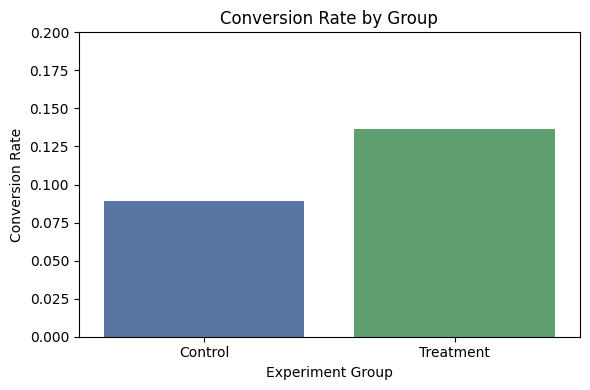

In [11]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    x="group",
    y="conversion_rate",
    hue="group",
    data=summary,
    palette=["#4C72B0", "#55A868"],
    dodge=False 
)

plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Experiment Group")
plt.ylim(0, 0.2)

# Remove legend properly
if ax.legend_ is not None:
    ax.legend_.remove()

plt.tight_layout()
plt.savefig("figures/conversion_rate.png")
plt.show()
plt.close()


<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    4. HYPOTHESIS TESTING (Two-Proportion Z-Test)
</p>


In [12]:
control = data[data["group"] == "Control"]["converted"]
treatment = data[data["group"] == "Treatment"]["converted"]

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
  Conversion counts
</p>


In [13]:
success_control = control.sum()
success_treatment = treatment.sum()

n_control = len(control)
n_treatment = len(treatment)

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
  Pooled probability
</p>


In [14]:
p_pool = (success_control + success_treatment) / (n_control + n_treatment)

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
  Standard error
</p>


In [15]:
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_control + 1/n_treatment))

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
   Z-score
</p>


In [16]:
z_score = ((success_treatment / n_treatment) - (success_control / n_control)) / se

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 20px;
    color: red;
    background-color: skyblue;
    font-weight: bold;
    border-radius: 20px;
    text-indent: 40px;
    border: 3px solid green;
    margin: 0;
    padding: 10px;
">
    P-value (two-tailed)
</p>


In [17]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    5. CONFIDENCE INTERVAL

</p>


In [18]:
diff = (success_treatment / n_treatment) - (success_control / n_control)
ci_low, ci_high = stats.norm.interval(
    0.95,
    loc=diff,
    scale=se
)

<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    6. BUSINESS INTERPRETATION

</p>


In [19]:
alpha = 0.05
decision = "REJECT NULL HYPOTHESIS" if p_value < alpha else "FAIL TO REJECT NULL"

results = {
    "Control Conversion Rate": success_control / n_control,
    "Treatment Conversion Rate": success_treatment / n_treatment,
    "Conversion Lift": diff,
    "Z-score": z_score,
    "P-value": p_value,
    "95% CI Lower": ci_low,
    "95% CI Upper": ci_high,
    "Decision": decision
}

results_df = pd.DataFrame([results])
results_df.to_csv("results/hypothesis_test_results.csv", index=False)

print("\nHypothesis Test Results:")
print(results_df.T)


Hypothesis Test Results:
                                                0
Control Conversion Rate                  0.089159
Treatment Conversion Rate                0.136229
Conversion Lift                           0.04707
Z-score                                   3.32423
P-value                                  0.000887
95% CI Lower                             0.019318
95% CI Upper                             0.074822
Decision                   REJECT NULL HYPOTHESIS


<p style="
    font-family: 'Times New Roman', serif;
    font-size: 30px;
    color: green;
    background-color: skyblue;
    font-weight: bold;
    text-align: center;
    border-radius: 20px;
    border: 3px solid green;
    padding: 15px;
    margin:0;
    padding:0;
">
    7. STORYTELLING SUMMARY (For Presentation)

</p>


In [20]:
story = f"""
BUSINESS QUESTION:
Did the new website layout increase conversion rate?

HYPOTHESIS:
H0: Conversion rate (Control) = Conversion rate (Treatment)
H1: Conversion rate (Treatment) > Conversion rate (Control)

KEY FINDINGS:
- Control Conversion Rate: {results['Control Conversion Rate']:.2%}
- Treatment Conversion Rate: {results['Treatment Conversion Rate']:.2%}
- Conversion Lift: {results['Conversion Lift']:.2%}

STATISTICAL VALIDATION:
- Z-score: {z_score:.2f}
- P-value: {p_value:.4f}
- 95% Confidence Interval: ({ci_low:.2%}, {ci_high:.2%})

BUSINESS DECISION:
{decision}

RECOMMENDATION:
{"Roll out the new website layout to all users." if decision == "REJECT NULL HYPOTHESIS" else "Do not roll out yet. Collect more data."}
"""

with open("results/business_story.txt", "w") as f:
    f.write(story)

print("\nBusiness Story Saved to results/business_story.txt")


Business Story Saved to results/business_story.txt
